In [1]:
%reload_ext autoreload
%autoreload 2

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
from markovsbi.bm.plot_utils import plot_metric_by_eval_steps, multi_plot, use_style
from markovsbi.bm.data_utils import query
from functools import partial

import matplotlib.pyplot as plt

In [3]:
DEFAULT_COLORS = {"nle": "#1e81b0", "nre": "#9bf2fa", "diffusion": "#f2a900", "npe": "#060169"}

col_size = 1.5
row_size = 1.3

In [4]:
df = query("../../results/bm_baseline")

In [5]:
runtimes = df[["method", "time_eval"]].groupby("method").mean()

In [6]:
runtimes

,time_eval
method,
diffusion,0.311762
nle,263.340649
npe,0.064681
nre,14.281061


(metric=='c2st')
1.5
(4.5, 1.45)
(task=='simple1dstationary') & (metric=='c2st')
(task=='simple2dstationary') & (metric=='c2st')
(task=='simple10dstationary') & (metric=='c2st')


/tmp/ipykernel_498800/4290994165.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$", "$10^3$"])
/tmp/ipykernel_498800/4290994165.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$", "$10^3$"])
/tmp/ipykernel_498800/4290994165.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$", "$10^3$"])
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: A

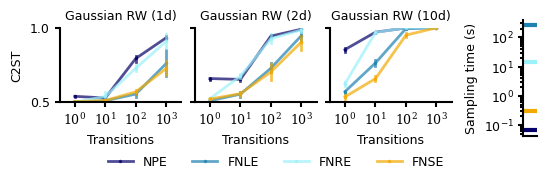

In [121]:
with use_style("pyloric"):
    fig, axes = multi_plot("../../results/bm_baseline",  "task", "metric", partial(plot_metric_by_eval_steps, hue="method"), color_map=DEFAULT_COLORS,  figsize_per_col=col_size , figsize_per_row=row_size + 0.15, legend_bbox_to_anchor=(0.6, -0.2), metric="c2st")
    
    for ax in axes[0][1:]:
        ax.set_yticklabels([])
    
    for ax in axes[0]:
        ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$", "$10^3$"])
        ax.set_yticks([0.5,1.])
    # Add an additional axes for the vertical runtime box next to the main plot
    ax2 = fig.add_axes([1.15, 0.1, 0.03, 0.8])  # Position for the vertical box
    
    axes[0,0].set_ylabel("C2ST", labelpad=-5)

    runtime_nle = runtimes.iloc[1].values
    runtime_nre = runtimes.iloc[3].values
    runtime_nse = runtimes.iloc[0].values
    runtime_npe = runtimes.iloc[2].values
    
    ax2.plot([0, 1], [runtime_nle, runtime_nle], color=DEFAULT_COLORS["nle"], lw=3)  # Vertical lines with color
    ax2.plot([0, 1], [runtime_nre, runtime_nre], color=DEFAULT_COLORS["nre"], lw=3)  # Vertical lines with color
    ax2.plot([0, 1], [runtime_nse, runtime_nse], color=DEFAULT_COLORS["diffusion"], lw=3)  # Vertical lines with color
    ax2.plot([0, 1], [runtime_npe, runtime_npe], color=DEFAULT_COLORS["npe"], lw=3)  # Vertical lines with color
    

    # Remove the axis ticks and labels to make it look like a runtime box
    ax2.set_xticks([])
    ax2.set_yticks([0,100])
    ax2.set_ylabel("Sampling time (s)")
    ax2.set_yscale("log")
    
    fig.savefig("simple_gaussian.svg")
fig

(metric=='swd')
1.5
(4.5, 1.45)
(task=='simple1dstationary') & (metric=='swd')
(task=='simple2dstationary') & (metric=='swd')
(task=='simple10dstationary') & (metric=='swd')


/tmp/ipykernel_498800/4061718860.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$", "$10^3$"])
/tmp/ipykernel_498800/4061718860.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$", "$10^3$"])
/tmp/ipykernel_498800/4061718860.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$", "$10^3$"])
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: A

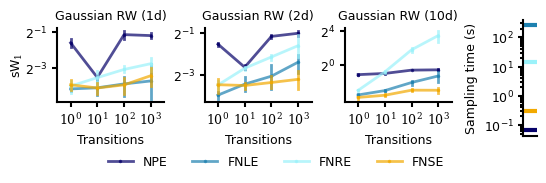

In [120]:
with use_style("pyloric"):
    fig, axes = multi_plot("../../results/bm_baseline",  "task", "metric", partial(plot_metric_by_eval_steps, hue="method"), color_map=DEFAULT_COLORS,  figsize_per_col=col_size, figsize_per_row=row_size+ 0.15, legend_bbox_to_anchor=(0.6, -0.2), metric="swd")
    
    for ax in axes[0]:
        ax.set_yscale("log")

        ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$", "$10^3$"])
        ax.set_yscale("log", base=2)
        # ax.set_ylim(0., 16.)
        # ax.set_yticks([2**-4, 2**0,2**4])
        # ax.set_yticklabels([r"$2^{\text{-}4}$", "$2^0$", "$2^4$"])


        
    # for ax in axes[0][1:]:
    #     ax.set_yticklabels([])
    # Add an additional axes for the vertical runtime box next to the main plot
    ax2 = fig.add_axes([1.15, 0.1, 0.03, 0.8])  # Position for the vertical box

    runtime_nle = runtimes.iloc[1].values
    runtime_nre = runtimes.iloc[3].values
    runtime_nse = runtimes.iloc[0].values
    runtime_npe = runtimes.iloc[2].values
    
    axes[0,0].set_ylabel("sW$_1$", labelpad=-5)
    axes[0,-1].set_yticks([2**0, 2**4])
    
    ax2.plot([0, 1], [runtime_nle, runtime_nle], color=DEFAULT_COLORS["nle"], lw=3)  # Vertical lines with color
    ax2.plot([0, 1], [runtime_nre, runtime_nre], color=DEFAULT_COLORS["nre"], lw=3)  # Vertical lines with color
    ax2.plot([0, 1], [runtime_nse, runtime_nse], color=DEFAULT_COLORS["diffusion"], lw=3)  # Vertical lines with color
    ax2.plot([0, 1], [runtime_npe, runtime_npe], color=DEFAULT_COLORS["npe"], lw=3)  # Vertical lines with color
    

    # Remove the axis ticks and labels to make it look like a runtime box
    ax2.set_xticks([])
  
    
    ax2.set_ylabel("Sampling time (s)")
    ax2.set_yscale("log")
    
    fig.savefig("simple_gaussian_swd.svg")
fig

(task=='double_well'|task=='mixture_rw_5d'|task=='periodic_sde'|task=='general_sde') & (num_steps==2|num_steps==11) & (metric=='c2st')
1.4
(5.6, 1.11)
(task=='periodic_sde') & (num_steps==2|num_steps==11) & (metric=='c2st')
(task=='general_sde') & (num_steps==2|num_steps==11) & (metric=='c2st')
(task=='mixture_rw_5d') & (num_steps==2|num_steps==11) & (metric=='c2st')
(task=='double_well') & (num_steps==2|num_steps==11) & (metric=='c2st')


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

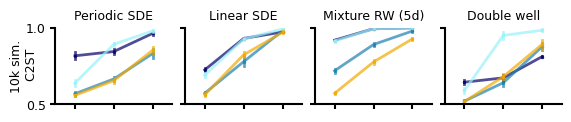

In [174]:
with use_style("pyloric"):
    fig, axes = multi_plot("../../results/bm_synthetic_10k",  "task", "metric", partial(plot_metric_by_eval_steps, hue="method"), legend_bbox_to_anchor=(0.5, -0.2),  figsize_per_col=col_size - 0.1, figsize_per_row=row_size-0.19,color_map=DEFAULT_COLORS, task=["double_well", "mixture_rw_5d", "periodic_sde", "general_sde"], num_steps=[2,11], metric="c2st", fig_legend=False)

    for i,ax in enumerate(axes[0]):
        ax.set_ylim(0.5,1.)
        ax.set_yticks([0.5,1.])
        ax.set_xlabel("")
        ax.set_xticklabels([])
        
        
        if i > 0:
            ax.set_yticklabels([])
            
    axes[0,0].set_ylabel("10k sim.\n\u00A0C2ST", x=-0.15)
    fig.savefig("bm_10k_c2st.svg")
fig

(task=='double_well'|task=='mixture_rw_5d'|task=='periodic_sde'|task=='general_sde') & (num_steps==2|num_steps==11) & (metric=='swd')
1.4
(5.6, 1.21)
(task=='periodic_sde') & (num_steps==2|num_steps==11) & (metric=='swd')
(task=='general_sde') & (num_steps==2|num_steps==11) & (metric=='swd')
(task=='mixture_rw_5d') & (num_steps==2|num_steps==11) & (metric=='swd')


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


(task=='double_well') & (num_steps==2|num_steps==11) & (metric=='swd')


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

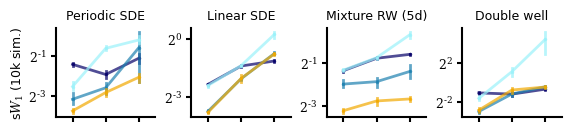

In [175]:
with use_style("pyloric"):
    fig, axes = multi_plot("../../results/bm_synthetic_10k",  "task", "metric", partial(plot_metric_by_eval_steps, hue="method"), legend_bbox_to_anchor=(0.5, -0.2),  figsize_per_col=col_size - 0.1, figsize_per_row=row_size-0.09,color_map=DEFAULT_COLORS, task=["double_well", "mixture_rw_5d", "periodic_sde", "general_sde"], num_steps=[2,11], metric="swd", fig_legend=False)

    for i,ax in enumerate(axes[0]):
        ax.set_yscale("log", base=2)
        # ax.set_ylim(0., 16.)
        # ax.set_yticks([2**-4, 2**0,2**4])
        # ax.set_yticklabels([r"$2^{\text{-}4}$", "$2^0$", "$2^4$"])
        ax.set_xlabel("")
        ax.set_xticklabels([])
        
    axes[0,0].set_yticks([2**-3, 2**-1])
    axes[0,0].set_yticklabels([r"$2^{\text{-}3}$", r"$2^{\text{-}1}$"])
    axes[0,1].set_yticks([2**-3, 2**0])
    axes[0,1].set_yticklabels([r"$2^{\text{-}3}$", r"$2^{0}$"])
    axes[0,2].set_yticks([2**-3, 2**-1])
    axes[0,2].set_yticklabels([r"$2^{\text{-}3}$", r"$2^{\text{-}1}$"])
    axes[0,3].set_yticks([2**-2, 2**2])
    axes[0,3].set_yticklabels([r"$2^{\text{-}2}$", r"$2^{2}$"])
            
    axes[0,0].set_ylabel(r"""s$W_1$ (10k sim.)""")
    fig.savefig("bm_10k.svg")
fig

(task=='double_well'|task=='mixture_rw_5d'|task=='periodic_sde'|task=='general_sde') & (num_steps==2|num_steps==11) & (metric=='c2st')
1.4
(5.6, 1.3)
(task=='periodic_sde') & (num_steps==2|num_steps==11) & (metric=='c2st')
(task=='general_sde') & (num_steps==2|num_steps==11) & (metric=='c2st')
(task=='mixture_rw_5d') & (num_steps==2|num_steps==11) & (metric=='c2st')
(task=='double_well') & (num_steps==2|num_steps==11) & (metric=='c2st')


/tmp/ipykernel_498800/887439202.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$"])
/tmp/ipykernel_498800/887439202.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$"])
/tmp/ipykernel_498800/887439202.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$"])
/tmp/ipykernel_498800/887439202.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$"])
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic f

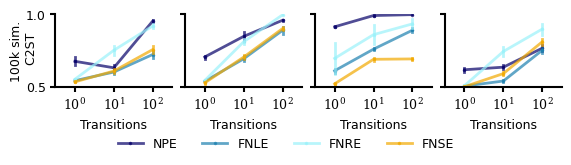

In [176]:
with use_style("pyloric"):
    fig, axes = multi_plot("../../results/bm_synthetic_100k",  "task", "metric", partial(plot_metric_by_eval_steps, hue="method"), legend_bbox_to_anchor=(0.5, -0.2),  figsize_per_col=col_size-0.1, figsize_per_row=row_size,color_map=DEFAULT_COLORS, task=["double_well", "mixture_rw_5d", "periodic_sde", "general_sde"], num_steps=[2,11], metric="c2st", fig_legend=True)

    for i,ax in enumerate(axes[0]):
        ax.set_ylim(0.5,1.)
        ax.set_yticks([0.5,1.])
        ax.set_title(None)
        # ax.set_xlabel("")
        ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$"])
        
        
        if i > 0:
            ax.set_yticklabels([])
            
    axes[0,0].set_ylabel("100k sim.\n\u00A0C2ST", x=-0.15)
    fig.savefig("bm_100k_c2st.svg")
fig

(task=='double_well'|task=='mixture_rw_5d'|task=='periodic_sde'|task=='general_sde') & (num_steps==2|num_steps==11) & (metric=='swd')
1.4
(5.6, 1.4000000000000001)
(task=='periodic_sde') & (num_steps==2|num_steps==11) & (metric=='swd')
(task=='general_sde') & (num_steps==2|num_steps==11) & (metric=='swd')
(task=='mixture_rw_5d') & (num_steps==2|num_steps==11) & (metric=='swd')
(task=='double_well') & (num_steps==2|num_steps==11) & (metric=='swd')


/tmp/ipykernel_498800/1905371923.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$"])
/tmp/ipykernel_498800/1905371923.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$"])
/tmp/ipykernel_498800/1905371923.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$"])
/tmp/ipykernel_498800/1905371923.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$"])
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: G

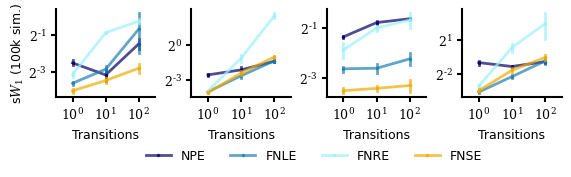

In [177]:
from matplotlib.ticker import MaxNLocator
with use_style("pyloric"):
    fig, axes = multi_plot("../../results/bm_synthetic_100k",  "task", "metric", partial(plot_metric_by_eval_steps, hue="method"), legend_bbox_to_anchor=(0.55, -0.2),  figsize_per_col=col_size-0.1, figsize_per_row=row_size +0.1 ,color_map=DEFAULT_COLORS, task=["double_well", "mixture_rw_5d", "periodic_sde", "general_sde"], num_steps=[2,11], metric="swd")
    #plt.subplots_adjust(wspace=-0.5)
    for i,ax in enumerate(axes[0]):
        ax.set_yscale("log", base=2)
        # ax.set_ylim(0., 16.)
        # ax.set_yticks([2**-4, 2**0,2**4])
        # ax.set_yticklabels([r"$2^{\text{-}4}$", "$2^0$", "$2^4$"])
        #ax.set_xlabel("")
        ax.set_title(None)
        ax.set_xticklabels([])
        ax.set_xticklabels(["$10^0$", "$10^1$", "$10^2$"])
    
    axes[0,0].set_yticks([2**-3, 2**-1])
    axes[0,0].set_yticklabels([r"$2^{\text{-}3}$", r"$2^{\text{-}1}$"])
    axes[0,1].set_yticks([2**-3, 2**0])
    axes[0,1].set_yticklabels([r"$2^{\text{-}3}$", r"$2^{0}$"])
    axes[0,2].set_yticks([2**-3, 2**-1])
    axes[0,2].set_yticklabels([r"$2^{\text{-}3}$", r"$2^{\text{-}1}$"])
    axes[0,3].set_yticks([2**-2, 2**1])
    axes[0,3].set_yticklabels([r"$2^{\text{-}2}$", r"$2^{1}$"])
            
    axes[0,0].set_ylabel(r"""s$W_1$ (100k sim.)""")
        
    fig.savefig("bm_100k.svg")
fig

In [178]:
df = query("../../results_old/bm_sampler100k",sampler=["em_fnpe", "em_gaus", "em_jac"], metric="c2st", eval_num_steps=501)
stat = df[["sampler","time_eval"]]

stat["time_eval"] = stat["time_eval"].astype(float)

stat = stat.groupby("sampler").mean()

(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (metric=='c2st') & (eval_num_steps==501)


/tmp/ipykernel_498800/689184626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat["time_eval"] = stat["time_eval"].astype(float)


In [179]:
df = query("../../results/bm_sampler100k",sampler=["pc_fnpe", "pc_gaus", "pc_jac"], metric="c2st")

(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (metric=='c2st')


(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='simple2dstationary'|task=='mixture_rw_5d') & (seed==0|seed==1|seed==2) & (metric=='c2st')
2.2
(2.2, 1.7333333333333334)
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='simple2dstationary') & (seed==0|seed==1|seed==2) & (metric=='c2st')
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='mixture_rw_5d') & (seed==0|seed==1|seed==2) & (metric=='c2st')


/tmp/ipykernel_498800/2644429897.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([0.5,1.])
/tmp/ipykernel_498800/2644429897.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([0.5,1.])
/tmp/ipykernel_498800/2644429897.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following 

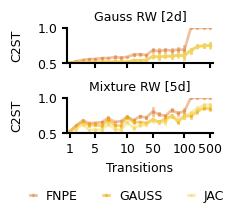

In [237]:

colors = {"em_fnpe": "#e28743", "em_gaus": "#f2a900", "em_jac": "#f2d95f"}
with use_style("pyloric"):
    idxs = [2,3,4,5,6,7,8,9,10,11,21,31,41,51,61, 71,81,91,101,201,301,401,501]
    fig, axes = multi_plot("../../results/bm_sampler100k",  "metric", "task", partial(plot_metric_by_eval_steps, hue="sampler", lw=2., alpha=0.5), legend_bbox_to_anchor=(0.55, -0.2),color_map=colors, figsize_per_col=col_size+0.7, figsize_per_row=row_size/1.5, metric=["c2st"], fig_legend=True, sampler=["em_fnpe", "em_gaus", "em_jac"], legend_ncol=3, task=["simple2dstationary", "mixture_rw_5d"], legend_kwargs={"handlelength":0.5}, seed=[0,1,2])
    for i,ax in enumerate(axes[:,0]):
        # ax.set_xticklabels([2,11,51,101])
        # ax.set_xticks([0,10,15,20])
        ax.set_ylim(0.5,1.)
        ax.set_yticklabels([0.5,1.])
        ax.set_yticks([0.5,1.])
        ax.set_ylabel("C2ST")
 
        if i < len(axes[:,0])-1:
            ax.set_xticklabels([])
            ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
        else:
            ax.set_xticklabels([1,5,10, 50,100,500])
            ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
            
    axes[0,0].set_title("Gauss RW [2d]")
    axes[1,0].set_title("Mixture RW [5d]")
    #axes[2,0].set_ylabel("Mix. RW")
    
    fig.savefig("samplers.svg", transparent=True)

    plt.show()

(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='simple2dstationary'|task=='mixture_rw_5d') & (metric=='swd')
2.2
(2.2, 1.7333333333333334)
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='simple2dstationary') & (metric=='swd')
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='mixture_rw_5d') & (metric=='swd')


/tmp/ipykernel_498800/3536865394.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found becaus

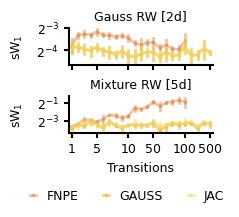

In [238]:

colors = {"em_fnpe": "#e28743", "em_gaus": "#f2a900", "em_jac": "#f2d95f"}
with use_style("pyloric"):
    idxs = [2,3,4,5,6,7,8,9,10,11,21,31,41,51,61, 71,81,91,101,201,301,401,501]
    fig, axes = multi_plot("../../results/bm_sampler100k",  "metric", "task", partial(plot_metric_by_eval_steps, hue="sampler", lw=2., alpha=0.5), legend_bbox_to_anchor=(0.55, -0.2),color_map=colors, figsize_per_col=col_size+0.7, figsize_per_row=row_size/1.5, metric=["swd"], fig_legend=True, sampler=["em_fnpe", "em_gaus", "em_jac"], legend_ncol=3, task=["simple2dstationary", "mixture_rw_5d"], legend_kwargs={"handlelength":0.5})
    for i,ax in enumerate(axes[:,0]):
        # ax.set_xticklabels([2,11,51,101])
        # ax.set_xticks([0,10,15,20])
        ax.set_ylabel(r"sW$_1$")
        ax.set_yscale("log", base=2)
        
        
 
        if i < len(axes[:,0])-1:
            ax.set_xticklabels([])
            ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
        else:
            ax.set_xticklabels([1,5,10, 50,100,500])
            ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
            
    axes[0,0].set_title("Gauss RW [2d]")
    axes[1,0].set_title("Mixture RW [5d]")
    #axes[2,0].set_ylabel("Mix. RW")
    
    fig.savefig("samplers_swd.svg", transparent=True)

    plt.show()

(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (metric=='swd')
2.0
(8.0, 1.1500000000000001)
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='simple2dstationary') & (metric=='swd')
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='periodic_sde') & (metric=='swd')
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='mixture_rw_2d') & (metric=='swd')
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='mixture_rw_5d') & (metric=='swd')


/tmp/ipykernel_498800/4254637870.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/4254637870.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/4254637870.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/4254637870.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found bec

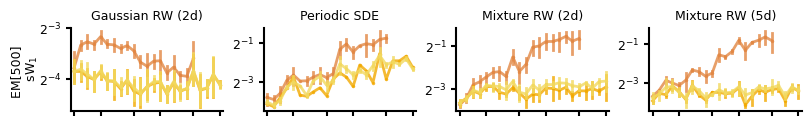

In [286]:

colors = {"em_fnpe": "#e28743", "em_gaus": "#f2a900", "em_jac": "#f2d95f"}
with use_style("pyloric"):
    idxs = [2,3,4,5,6,7,8,9,10,11,21,31,41,51,61, 71,81,91,101,201,301,401,501]
    fig, axes = multi_plot("../../results/bm_sampler100k",  "task", "metric", partial(plot_metric_by_eval_steps, hue="sampler", lw=2., alpha=0.8), legend_bbox_to_anchor=(0.55, -0.3),color_map=colors, figsize_per_col=col_size+0.5, figsize_per_row=row_size-0.15, metric=["swd"], fig_legend=False, sampler=["em_fnpe", "em_gaus", "em_jac"], legend_ncol=3, legend_kwargs={"handlelength":1})
    for i,ax in enumerate(axes[0,:]):
        # ax.set_xticklabels([2,11,51,101])
        # ax.set_xticks([0,10,15,20])
        axes[0,0].set_ylabel("EM[500] \n\u00A0sW$_1$", x=-0.2)
        ax.set_yscale("log", base=2)
        ax.set_xlabel("")
        if i > 0:
            ax.set_ylabel("")
        
        
 
        # if i < len(axes[:,0])-1:
        #     ax.set_xticklabels([])
        #     ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
        # else:
        ax.set_xticklabels([1,5,10, 50,100,500])
        ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
        ax.set_xticklabels([])
            

    #axes[2,0].set_ylabel("Mix. RW")
    
    fig.savefig("samplers_swd_full_em.svg", transparent=True)

    plt.show()

(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (metric=='swd')
2.0
(8.0, 1.1)
(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (task=='simple2dstationary') & (metric=='swd')
(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (task=='periodic_sde') & (metric=='swd')
(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (task=='mixture_rw_2d') & (metric=='swd')
(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (task=='mixture_rw_5d') & (metric=='swd')


/tmp/ipykernel_498800/1634441737.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/1634441737.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/1634441737.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/1634441737.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found bec

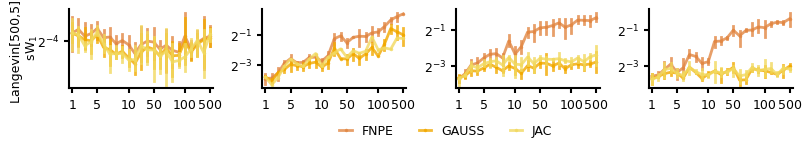

In [285]:

colors = {"pc_fnpe": "#e28743", "pc_gaus": "#f2a900", "pc_jac": "#f2d95f"}
with use_style("pyloric"):
    idxs = [2,3,4,5,6,7,8,9,10,11,21,31,41,51,61, 71,81,91,101,201,301,401,501]
    fig, axes = multi_plot("../../results/bm_sampler100k",  "task", "metric", partial(plot_metric_by_eval_steps, hue="sampler", lw=2., alpha=0.8), legend_bbox_to_anchor=(0.55, -0.3),color_map=colors, figsize_per_col=col_size+0.5, figsize_per_row=row_size - 0.2, metric=["swd"], fig_legend=True, sampler=["pc_fnpe", "pc_gaus", "pc_jac"], legend_ncol=3, legend_kwargs={"handlelength":1})
    for i,ax in enumerate(axes[0,:]):
        # ax.set_xticklabels([2,11,51,101])
        # ax.set_xticks([0,10,15,20])
        axes[0,0].set_ylabel("Langevin[500,5] \n\u00A0sW$_1$", x=-0.2)
        ax.set_yscale("log", base=2)
        ax.set_title("")
        ax.set_xlabel("")
        
        if i > 0:
            ax.set_ylabel("")
        
        
 
        # if i < len(axes[:,0])-1:
        #     ax.set_xticklabels([])
        #     ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
        # else:
        ax.set_xticklabels([1,5,10, 50,100,500])
        ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
            

    #axes[2,0].set_ylabel("Mix. RW")
    
    fig.savefig("samplers_swd_full_pc.svg", transparent=True)

    plt.show()

(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (metric=='swd')
2.0
(8.0, 1.1500000000000001)
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='simple2dstationary') & (metric=='swd')
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='periodic_sde') & (metric=='swd')
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='mixture_rw_2d') & (metric=='swd')
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='mixture_rw_5d') & (metric=='swd')


/tmp/ipykernel_498800/2534570843.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,32)
/tmp/ipykernel_498800/2534570843.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/2534570843.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,32)
/tmp/ipykernel_498800/2534570843.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/2534570843.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,32)
/tmp/ipykernel_498800/2534570843.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or 

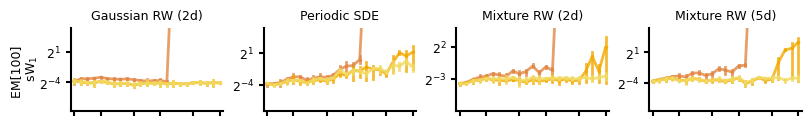

In [284]:

colors = {"em_fnpe": "#e28743", "em_gaus": "#f2a900", "em_jac": "#f2d95f"}
with use_style("pyloric"):
    idxs = [2,3,4,5,6,7,8,9,10,11,21,31,41,51,61, 71,81,91,101,201,301,401,501]
    fig, axes = multi_plot("../../results/bm_sampler100kT100",  "task", "metric", partial(plot_metric_by_eval_steps, hue="sampler", lw=2., alpha=0.8), legend_bbox_to_anchor=(0.55, -0.3),color_map=colors, figsize_per_col=col_size+0.5, figsize_per_row=row_size-0.15, metric=["swd"], fig_legend=False, sampler=["em_fnpe", "em_gaus", "em_jac"], legend_ncol=3, legend_kwargs={"handlelength":1})
    for i,ax in enumerate(axes[0,:]):
        # ax.set_xticklabels([2,11,51,101])
        # ax.set_xticks([0,10,15,20])
        axes[0,0].set_ylabel("EM[100] \n\u00A0sW$_1$", x=-0.2)
        ax.set_yscale("log", base=2)
        ax.set_xlabel("")
        if i > 0:
            ax.set_ylabel("")
            
        ax.set_ylim(0,32)
        
        
 
        # if i < len(axes[:,0])-1:
        #     ax.set_xticklabels([])
        #     ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
        # else:
        ax.set_xticklabels([1,5,10, 50,100,500])
        ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
        ax.set_xticklabels([])
            

    #axes[2,0].set_ylabel("Mix. RW")
    
    fig.savefig("samplers_swd_full_em100.svg", transparent=True)

    plt.show()

(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (metric=='swd')
2.0
(8.0, 1.1)
(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (task=='simple2dstationary') & (metric=='swd')
(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (task=='periodic_sde') & (metric=='swd')
(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (task=='mixture_rw_2d') & (metric=='swd')
(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (task=='mixture_rw_5d') & (metric=='swd')


/tmp/ipykernel_498800/3086806709.py:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,32)
/tmp/ipykernel_498800/3086806709.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/3086806709.py:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,32)
/tmp/ipykernel_498800/3086806709.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/3086806709.py:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,32)
/tmp/ipykernel_498800/3086806709.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or 

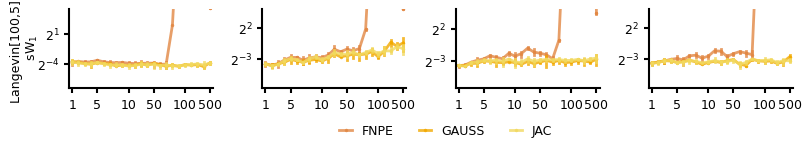

In [283]:

colors = {"pc_fnpe": "#e28743", "pc_gaus": "#f2a900", "pc_jac": "#f2d95f"}
with use_style("pyloric"):
    idxs = [2,3,4,5,6,7,8,9,10,11,21,31,41,51,61, 71,81,91,101,201,301,401,501]
    fig, axes = multi_plot("../../results/bm_sampler100kT100",  "task", "metric", partial(plot_metric_by_eval_steps, hue="sampler", lw=2., alpha=0.8), legend_bbox_to_anchor=(0.55, -0.3),color_map=colors, figsize_per_col=col_size+0.5, figsize_per_row=row_size - 0.2, metric=["swd"], fig_legend=True, sampler=["pc_fnpe", "pc_gaus", "pc_jac"], legend_ncol=3, legend_kwargs={"handlelength":1})
    for i,ax in enumerate(axes[0,:]):
        # ax.set_xticklabels([2,11,51,101])
        # ax.set_xticks([0,10,15,20])
        axes[0,0].set_ylabel("Langevin[100,5] \n\u00A0sW$_1$", x=-0.2)
        ax.set_yscale("log", base=2)
        ax.set_title("")
        ax.set_xlabel("")
        ax.set_ylim(0,32)
        
        if i > 0:
            ax.set_ylabel("")
        
        
 
        # if i < len(axes[:,0])-1:
        #     ax.set_xticklabels([])
        #     ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
        # else:
        ax.set_xticklabels([1,5,10, 50,100,500])
        ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
            

    #axes[2,0].set_ylabel("Mix. RW")
    
    fig.savefig("samplers_swd_full_pc100.svg", transparent=True)

    plt.show()

(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (metric=='c2st')
2.0
(8.0, 1.1500000000000001)
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='simple2dstationary') & (metric=='c2st')
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='periodic_sde') & (metric=='c2st')
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='mixture_rw_2d') & (metric=='c2st')
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='mixture_rw_5d') & (metric=='c2st')


/tmp/ipykernel_498800/352111633.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/352111633.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/352111633.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/352111633.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

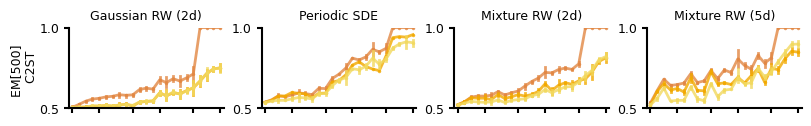

In [282]:

colors = {"em_fnpe": "#e28743", "em_gaus": "#f2a900", "em_jac": "#f2d95f"}
with use_style("pyloric"):
    idxs = [2,3,4,5,6,7,8,9,10,11,21,31,41,51,61, 71,81,91,101,201,301,401,501]
    fig, axes = multi_plot("../../results/bm_sampler100k",  "task", "metric", partial(plot_metric_by_eval_steps, hue="sampler", lw=2., alpha=0.8), legend_bbox_to_anchor=(0.55, -0.3),color_map=colors, figsize_per_col=col_size+0.5, figsize_per_row=row_size-0.15, metric=["c2st"], fig_legend=False, sampler=["em_fnpe", "em_gaus", "em_jac"], legend_ncol=3, legend_kwargs={"handlelength":1})
    for i,ax in enumerate(axes[0,:]):
        # ax.set_xticklabels([2,11,51,101])
        # ax.set_xticks([0,10,15,20])
        axes[0,0].set_ylabel("EM[500] \n\u00A0C2ST", x=-0.2)
        #ax.set_yscale("log", base=2)
        ax.set_ylim(0.5,1.)
        ax.set_yticks([0.5,1.])
        ax.set_xlabel("")
        if i > 0:
            ax.set_ylabel("")
        
        
 
        # if i < len(axes[:,0])-1:
        #     ax.set_xticklabels([])
        #     ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
        # else:
        ax.set_xticklabels([1,5,10, 50,100,500])
        ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
        ax.set_xticklabels([])
            

    #axes[2,0].set_ylabel("Mix. RW")
    
    fig.savefig("samplers_swd_full_em_c2st.svg", transparent=True)

    plt.show()

(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (metric=='c2st')
2.0
(8.0, 1.1)
(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (task=='simple2dstationary') & (metric=='c2st')
(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (task=='periodic_sde') & (metric=='c2st')
(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (task=='mixture_rw_2d') & (metric=='c2st')
(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (task=='mixture_rw_5d') & (metric=='c2st')


/tmp/ipykernel_498800/4094043857.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/4094043857.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/4094043857.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/4094043857.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found bec

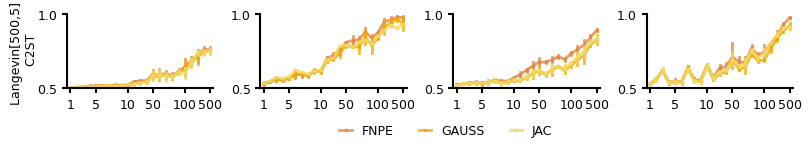

In [281]:

colors = {"pc_fnpe": "#e28743", "pc_gaus": "#f2a900", "pc_jac": "#f2d95f"}
with use_style("pyloric"):
    idxs = [2,3,4,5,6,7,8,9,10,11,21,31,41,51,61, 71,81,91,101,201,301,401,501]
    fig, axes = multi_plot("../../results/bm_sampler100k",  "task", "metric", partial(plot_metric_by_eval_steps, hue="sampler", lw=2., alpha=0.8), legend_bbox_to_anchor=(0.55, -0.3),color_map=colors, figsize_per_col=col_size+0.5, figsize_per_row=row_size - 0.2, metric=["c2st"], fig_legend=True, sampler=["pc_fnpe", "pc_gaus", "pc_jac"], legend_ncol=3, legend_kwargs={"handlelength":1})
    for i,ax in enumerate(axes[0,:]):
        # ax.set_xticklabels([2,11,51,101])
        # ax.set_xticks([0,10,15,20])
        axes[0,0].set_ylabel("Langevin[500,5] \n\u00A0C2ST", x=-0.2)
        #ax.set_yscale("log", base=2)
        ax.set_ylim(0.5,1.)
        ax.set_yticks([0.5,1.0])
        ax.set_title("")
        ax.set_xlabel("")
        
        if i > 0:
            ax.set_ylabel("")
        
        
 
        # if i < len(axes[:,0])-1:
        #     ax.set_xticklabels([])
        #     ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
        # else:
        ax.set_xticklabels([1,5,10, 50,100,500])
        ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
            

    #axes[2,0].set_ylabel("Mix. RW")
    
    fig.savefig("samplers_swd_full_pc_c2st.svg", transparent=True)

    plt.show()

(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (metric=='c2st')
2.0
(8.0, 1.1500000000000001)
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='simple2dstationary') & (metric=='c2st')
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='periodic_sde') & (metric=='c2st')
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='mixture_rw_2d') & (metric=='c2st')
(sampler=='em_fnpe'|sampler=='em_gaus'|sampler=='em_jac') & (task=='mixture_rw_5d') & (metric=='c2st')


/tmp/ipykernel_498800/2387908627.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/2387908627.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/2387908627.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/2387908627.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found bec

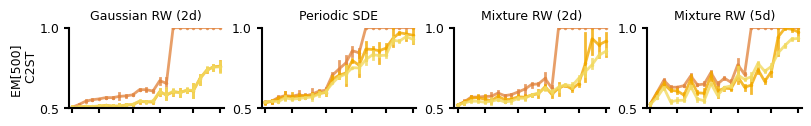

In [289]:

colors = {"em_fnpe": "#e28743", "em_gaus": "#f2a900", "em_jac": "#f2d95f"}
with use_style("pyloric"):
    idxs = [2,3,4,5,6,7,8,9,10,11,21,31,41,51,61, 71,81,91,101,201,301,401,501]
    fig, axes = multi_plot("../../results/bm_sampler100kT100",  "task", "metric", partial(plot_metric_by_eval_steps, hue="sampler", lw=2., alpha=0.8), legend_bbox_to_anchor=(0.55, -0.3),color_map=colors, figsize_per_col=col_size+0.5, figsize_per_row=row_size-0.15, metric=["c2st"], fig_legend=False, sampler=["em_fnpe", "em_gaus", "em_jac"], legend_ncol=3, legend_kwargs={"handlelength":1})
    for i,ax in enumerate(axes[0,:]):
        # ax.set_xticklabels([2,11,51,101])
        # ax.set_xticks([0,10,15,20])
        axes[0,0].set_ylabel("EM[500] \n\u00A0C2ST", x=-0.2)
        #ax.set_yscale("log", base=2)
        ax.set_ylim(0.5,1.)
        ax.set_yticks([0.5,1.])
        ax.set_xlabel("")
        if i > 0:
            ax.set_ylabel("")
        
        
 
        # if i < len(axes[:,0])-1:
        #     ax.set_xticklabels([])
        #     ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
        # else:
        ax.set_xticklabels([1,5,10, 50,100,500])
        ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
        ax.set_xticklabels([])
            

    #axes[2,0].set_ylabel("Mix. RW")
    
    fig.savefig("samplers_swd_full_em_c2st100.svg", transparent=True)

    plt.show()

(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (metric=='c2st')
2.0
(8.0, 1.1)
(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (task=='simple2dstationary') & (metric=='c2st')
(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (task=='periodic_sde') & (metric=='c2st')
(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (task=='mixture_rw_2d') & (metric=='c2st')
(sampler=='pc_fnpe'|sampler=='pc_gaus'|sampler=='pc_jac') & (task=='mixture_rw_5d') & (metric=='c2st')


/tmp/ipykernel_498800/1788521013.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/1788521013.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/1788521013.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
/tmp/ipykernel_498800/1788521013.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,5,10, 50,100,500])
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found bec

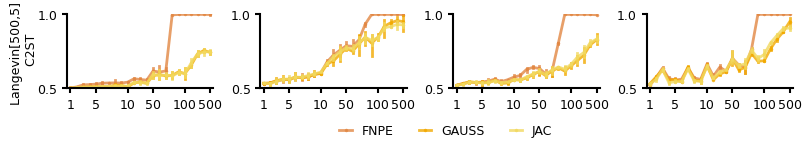

In [290]:

colors = {"pc_fnpe": "#e28743", "pc_gaus": "#f2a900", "pc_jac": "#f2d95f"}
with use_style("pyloric"):
    idxs = [2,3,4,5,6,7,8,9,10,11,21,31,41,51,61, 71,81,91,101,201,301,401,501]
    fig, axes = multi_plot("../../results/bm_sampler100kT100",  "task", "metric", partial(plot_metric_by_eval_steps, hue="sampler", lw=2., alpha=0.8), legend_bbox_to_anchor=(0.55, -0.3),color_map=colors, figsize_per_col=col_size+0.5, figsize_per_row=row_size - 0.2, metric=["c2st"], fig_legend=True, sampler=["pc_fnpe", "pc_gaus", "pc_jac"], legend_ncol=3, legend_kwargs={"handlelength":1})
    for i,ax in enumerate(axes[0,:]):
        # ax.set_xticklabels([2,11,51,101])
        # ax.set_xticks([0,10,15,20])
        axes[0,0].set_ylabel("Langevin[500,5] \n\u00A0C2ST", x=-0.2)
        #ax.set_yscale("log", base=2)
        ax.set_ylim(0.5,1.)
        ax.set_yticks([0.5,1.0])
        ax.set_title("")
        ax.set_xlabel("")
        
        if i > 0:
            ax.set_ylabel("")
        
        
 
        # if i < len(axes[:,0])-1:
        #     ax.set_xticklabels([])
        #     ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
        # else:
        ax.set_xticklabels([1,5,10, 50,100,500])
        ax.set_xticks([idxs.index(i) for i in [2,6,11, 51,101,501]])
            

    #axes[2,0].set_ylabel("Mix. RW")
    
    fig.savefig("samplers_swd_full_pc_c2st100.svg", transparent=True)

    plt.show()

In [257]:
df = query("../../results/bm_sampler100k")[["sampler", "eval_num_steps", "time_eval"]]

In [263]:
df["time_eval"] = df["time_eval"].apply(lambda x: float(x) if x != "[None]" else 0.)

In [264]:
stats = df.groupby(["sampler", "eval_num_steps"]).mean()

In [279]:
stats.unstack("sampler")

time_eval                                                 
sampler          em_fnpe   em_gaus    em_jac   pc_fnpe  pc_gaus    pc_jac
eval_num_steps                                                           
2.0             0.315068  1.631525  1.936641  0.573654  1.71064  2.516432
3.0             0.286994  1.631525  1.936641  0.573654  1.71064  2.516432
4.0             0.286994  1.631525  1.936641  0.573654  1.71064  2.516432
5.0             0.286994  1.631525  1.936641  0.573654  1.71064  2.516432
6.0             0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
7.0             0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
8.0             0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
9.0             0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
10.0            0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
11.0            0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
21.0            0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
31.0            0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
41.0            0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
51.0            0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
61.0            0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
71.0            0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
81.0            0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
91.0            0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
101.0           0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
201.0           0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
301.0           0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
401.0           0.286994  1.631525  1.936641  0.573654  1.65622  2.516432
501.0           0.286994  1.631525  1.936641  0.573654  1.65622  2.516432